In [46]:
import warnings
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [47]:
warnings.filterwarnings("ignore")

In [48]:
india_daily = pd.read_csv('data/India_daily_return.csv',index_col=0)
india_weekly = pd.read_csv('data/India_weekly_return.csv',index_col=0)
india_monthly = pd.read_csv('data/India_monthly_return.csv',index_col=0)


india_daily.index = pd.to_datetime(india_daily.index, format='%Y-%m-%d')
india_weekly.index = pd.to_datetime(india_weekly.index, format='%Y-%m-%d')
india_monthly.index = pd.to_datetime(india_monthly.index, format='%Y-%m-%d')
india_daily.head()

,Price,Open,High,Low,Vol.,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2015-05-20,1472.0,1470.0,1476.0,1466.0,0.28,0.00,0.0000
2015-05-21,1496.0,1496.0,1514.0,1493.0,5.47,1.63,2.6569
2015-05-22,1489.0,1502.0,1502.0,1487.0,4.38,-0.47,0.2209
2015-05-25,1473.0,1484.0,1490.0,1468.0,5.96,-1.07,1.1449
2015-05-26,1482.0,1469.0,1485.0,1469.0,7.93,0.61,0.3721


In [49]:
us_daily = pd.read_csv('data/US_daily_return.csv',index_col=0)
us_weekly = pd.read_csv('data/US_weekly_return.csv',index_col=0)
us_monthly = pd.read_csv('data/US_monthly_return.csv',index_col=0)


us_daily.index = pd.to_datetime(us_daily.index, format='%Y-%m-%d')
us_weekly.index = pd.to_datetime(us_weekly.index, format='%Y-%m-%d')
us_monthly.index = pd.to_datetime(us_monthly.index, format='%Y-%m-%d')
us_daily.head()

,Open,High,Low,Close,Volume,Daily Change (%),Daily Change (%) Squared
Date,,,,,,,
2000-09-21,296.0,296.0,292.00,293.75,4842,0.00,0.0000
2000-09-22,293.5,297.0,293.25,295.50,3945,0.60,0.3600
2000-09-25,297.5,300.0,297.00,299.50,5073,1.35,1.8225
2000-09-26,301.0,303.5,299.75,302.00,9180,0.83,0.6889
2000-09-27,301.5,308.0,301.00,307.75,11145,1.90,3.6100


## ADF Test

In [50]:
result = adfuller(india_daily['Daily Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -32.815660544041926
p-value: 0.0


In [51]:
result = adfuller(india_weekly['Weekly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.982036209427324
p-value: 8.997601312293068e-30


In [52]:
result = adfuller(india_monthly['Monthly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -11.921573157063959
p-value: 5.017938243248519e-22


In [53]:
result = adfuller(us_daily['Daily Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -75.5922172220999
p-value: 0.0


In [54]:
result = adfuller(us_weekly['Weekly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -35.81176621104672
p-value: 0.0


In [55]:
result = adfuller(us_monthly['Monthly Change (%)'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -16.087250489683207
p-value: 5.300011692598084e-29


In [56]:
def model(data, p, d, q):
    df = data.iloc[:, -1]
    
    arima = ARIMA(df, order=(p, d, q))
    arima = arima.fit()
    residuals = arima.resid
    
    return arima.summary(), residuals

## India Daily

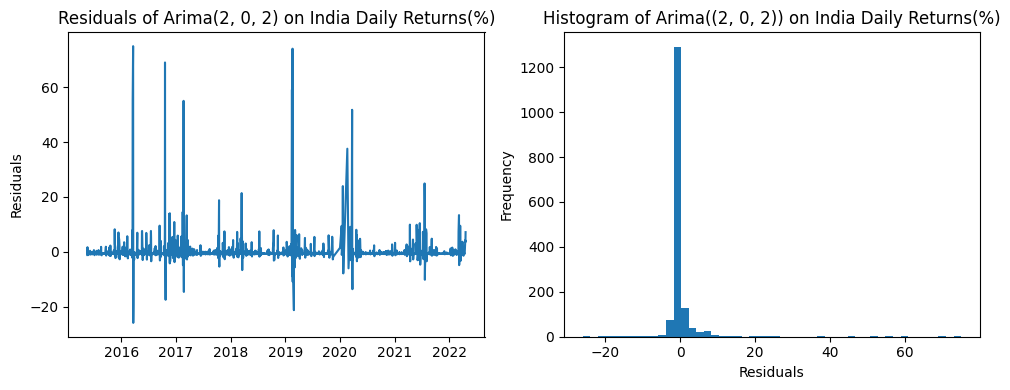

In [57]:
p, d, q = 2, 0, 2
df, residuals = model(india_daily, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima(2, 0, 2) on India Daily Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on India Daily Returns(%)')
plt.tight_layout()
plt.show()

In [58]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Daily Change (%) Squared   No. Observations:                 1629
Model:                       ARIMA(2, 0, 2)   Log Likelihood               -4969.108
Date:                      Sat, 12 Oct 2024   AIC                           9950.215
Time:                              10:51:59   BIC                           9982.589
Sample:                                   0   HQIC                          9962.226
                                     - 1629                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.2052      0.462      2.606      0.009       0.299       2.112
ar.L1         -0.0912      0.049     -1.868      0.062      -0.187       0.004
ar.L2          0.4244      0.038     11.147      0.000       0.350       0.499
ma.L1          0.2286      0.049      4.679      0.000       0.133       0.324
ma.L2         -0.1474      0.042     -3.498      0.000      -0.230      -0.065
sigma2        26.1230      0.249    104.884      0.000      25.635      26.611
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):            916651.52
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.40   Skew:                             9.27
Prob(H) (two-sided):                  0.00   Kurtosis:                       117.72
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -40.194174062286535
p-value: 0.0


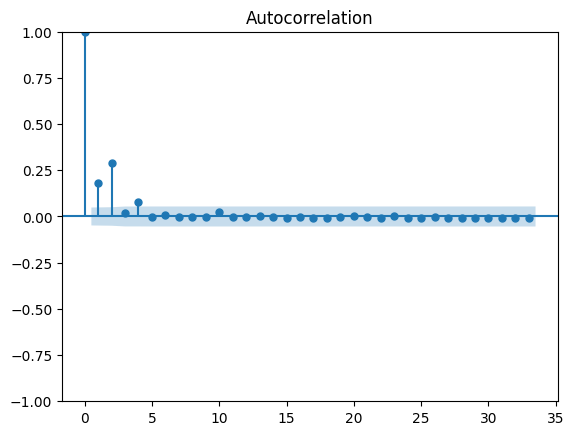

In [60]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

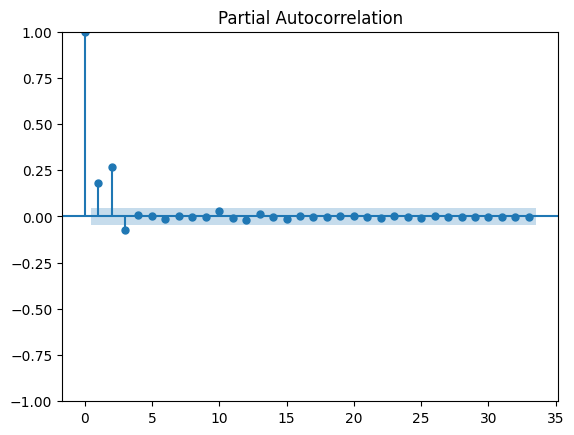

In [61]:
plot_pacf(squared_residual)
plt.show()

## India Weekly

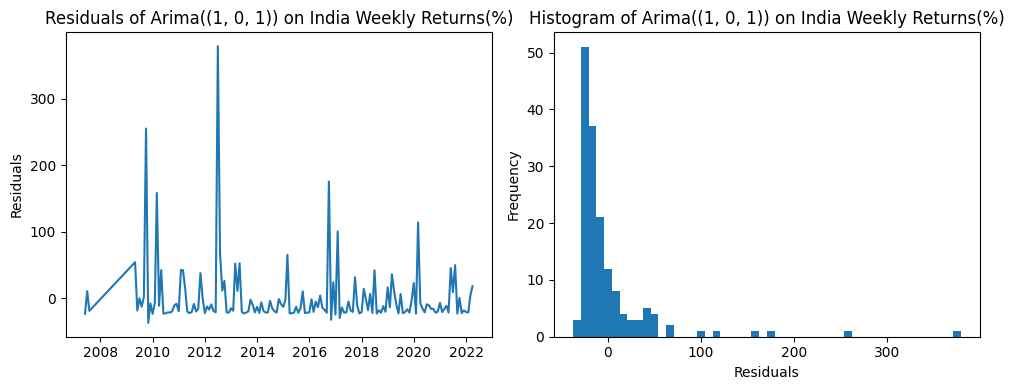

In [62]:
p, d, q = 1, 0, 1
df, residuals = model(india_monthly, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima({p, d, q}) on India Weekly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on India Weekly Returns(%)')
plt.tight_layout()
plt.show()

In [63]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Monthly Change (%) Squared   No. Observations:                  159
Model:                         ARIMA(1, 0, 1)   Log Likelihood                -840.750
Date:                        Sat, 12 Oct 2024   AIC                           1689.500
Time:                                10:52:00   BIC                           1701.776
Sample:                                     0   HQIC                          1694.485
                                        - 159                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5556      8.390      2.808      0.005       7.112      39.999
ar.L1          0.2893      2.374      0.122      0.903      -4.363       4.942
ma.L1         -0.2241      2.369     -0.095      0.925      -4.867       4.419
sigma2      2292.8231    153.976     14.891      0.000    1991.036    2594.610
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6222.83
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             4.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.560839597087629
p-value: 2.104343554697953e-23


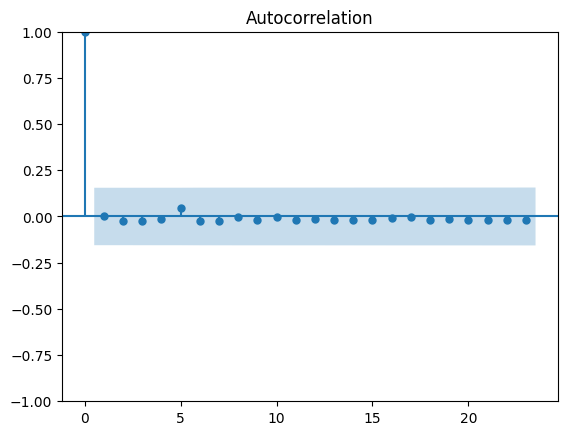

In [65]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

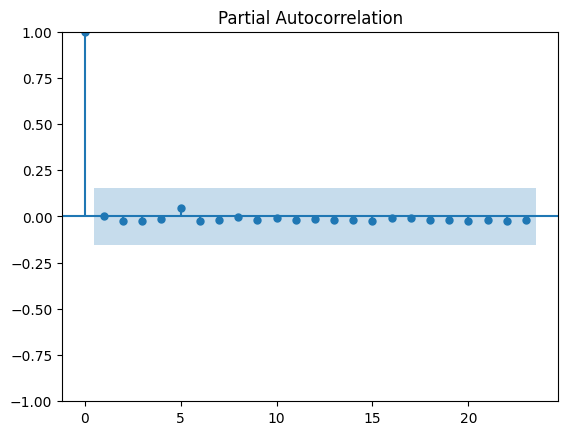

In [66]:
plot_pacf(squared_residual)
plt.show()

## India Monthly

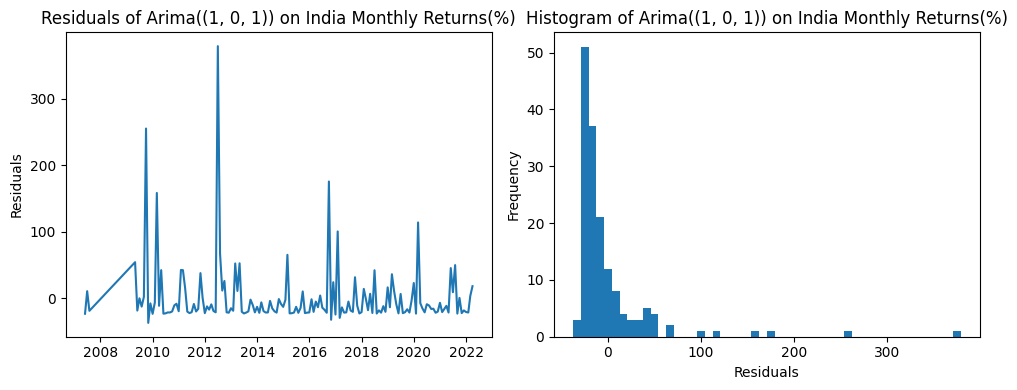

In [67]:
p, d, q = 1, 0, 1
df, residuals = model(india_monthly, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima({p, d, q}) on India Monthly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on India Monthly Returns(%)')
plt.tight_layout()
plt.show()

In [68]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Monthly Change (%) Squared   No. Observations:                  159
Model:                         ARIMA(1, 0, 1)   Log Likelihood                -840.750
Date:                        Sat, 12 Oct 2024   AIC                           1689.500
Time:                                10:52:00   BIC                           1701.776
Sample:                                     0   HQIC                          1694.485
                                        - 159                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.5556      8.390      2.808      0.005       7.112      39.999
ar.L1          0.2893      2.374      0.122      0.903      -4.363       4.942
ma.L1         -0.2241      2.369     -0.095      0.925      -4.867       4.419
sigma2      2292.8231    153.976     14.891      0.000    1991.036    2594.610
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              6222.83
Prob(Q):                              0.95   Prob(JB):                         0.00
Heteroskedasticity (H):               0.13   Skew:                             4.80
Prob(H) (two-sided):                  0.00   Kurtosis:                        32.11
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [69]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -12.560839597087629
p-value: 2.104343554697953e-23


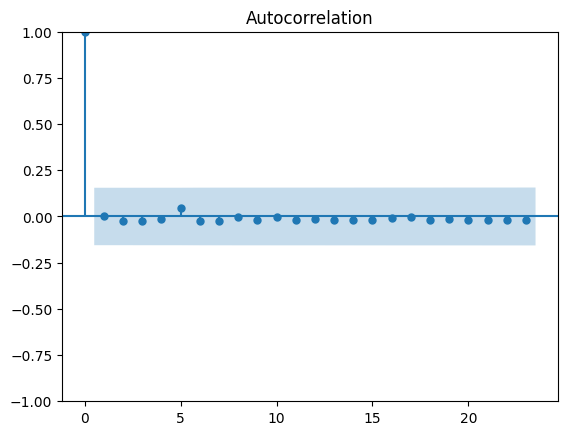

In [70]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

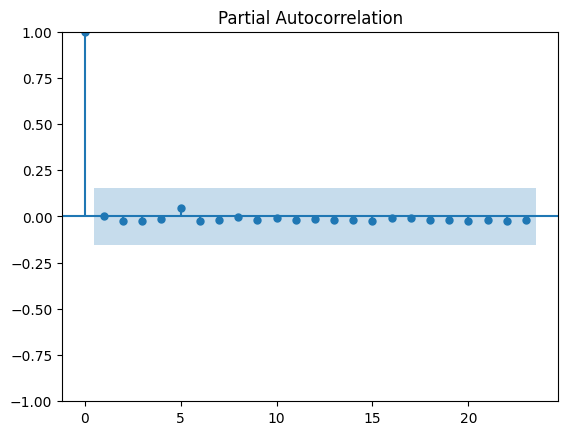

In [71]:
plot_pacf(squared_residual)
plt.show()

## US Daily

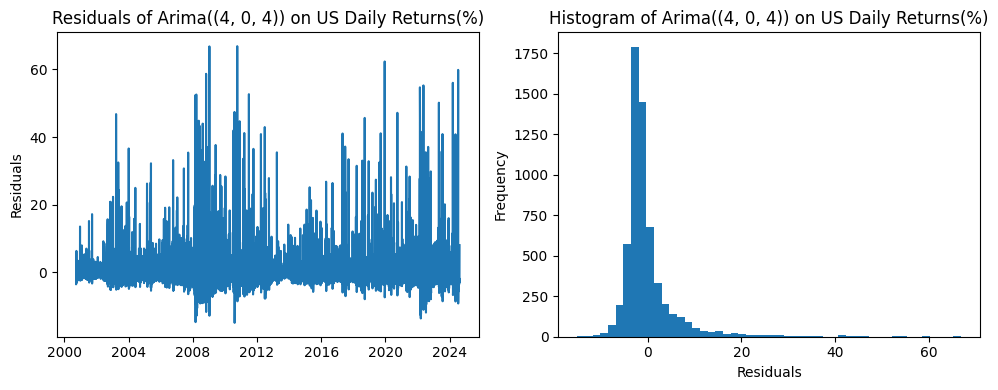

In [72]:
p, d, q = 4, 0, 4
df, residuals = model(us_daily, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima({p, d, q}) on US Daily Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on US Daily Returns(%)')
plt.tight_layout()
plt.show()

In [73]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                   
====================================================================================
Dep. Variable:     Daily Change (%) Squared   No. Observations:                 6014
Model:                       ARIMA(4, 0, 4)   Log Likelihood              -19767.539
Date:                      Sat, 12 Oct 2024   AIC                          39555.078
Time:                              10:52:09   BIC                          39622.097
Sample:                                   0   HQIC                         39578.349
                                     - 6014                                         
Covariance Type:                        opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.5318      0.782      4.518      0.000       2.000       5.064
ar.L1          1.3622      1.803      0.755      0.450      -2.172       4.896
ar.L2          0.5375      1.428      0.376      0.707      -2.261       3.336
ar.L3         -1.3578      1.795     -0.757      0.449      -4.875       2.160
ar.L4          0.4570      1.424      0.321      0.748      -2.333       3.247
ma.L1         -1.2711      1.801     -0.706      0.480      -4.801       2.258
ma.L2         -0.5826      1.257     -0.464      0.643      -3.046       1.881
ma.L3          1.2708      1.784      0.712      0.476      -2.227       4.768
ma.L4         -0.4108      1.264     -0.325      0.745      -2.889       2.067
sigma2        42.2776      0.365    115.778      0.000      41.562      42.993
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):            164956.34
Prob(Q):                              0.87   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                             4.09
Prob(H) (two-sided):                  0.00   Kurtosis:                        27.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -77.69092397273106
p-value: 0.0


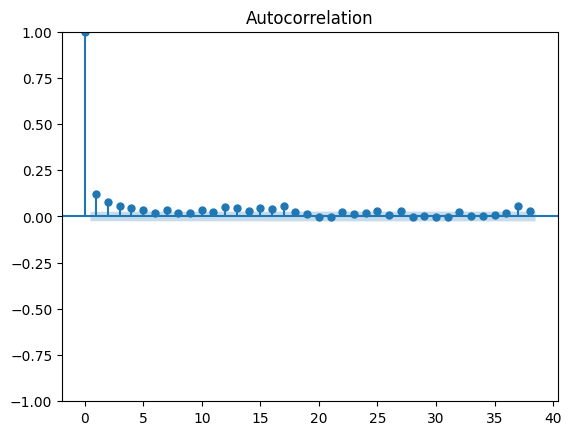

In [75]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

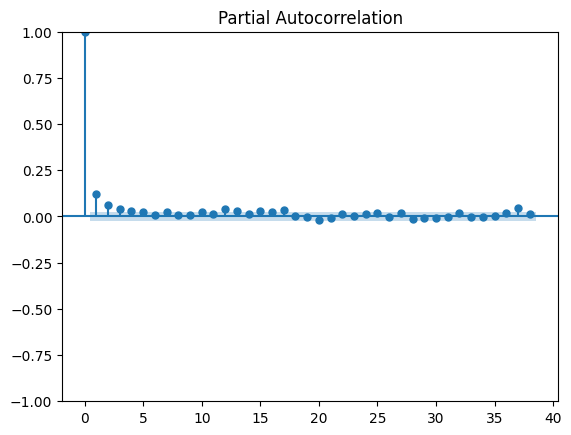

In [76]:
plot_pacf(squared_residual)
plt.show()

## US Weekly

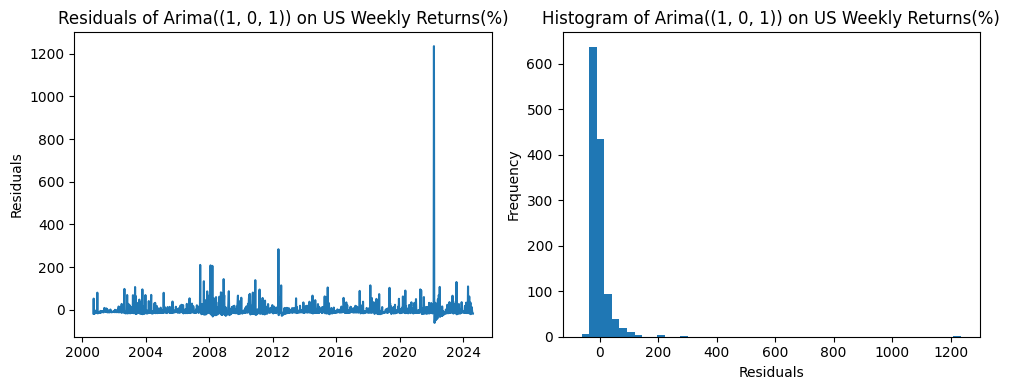

In [77]:
p, d, q = 1, 0, 1
df, residuals = model(us_weekly, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima({p, d, q}) on US Weekly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on US Weekly Returns(%)')
plt.tight_layout()
plt.show()

In [78]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                   
=====================================================================================
Dep. Variable:     Weekly Change (%) Squared   No. Observations:                 1248
Model:                        ARIMA(1, 0, 1)   Log Likelihood               -6496.298
Date:                       Sat, 12 Oct 2024   AIC                          13000.596
Time:                               10:52:10   BIC                          13021.113
Sample:                           09-18-2000   HQIC                         13008.310
                                - 08-12-2024                                         
Covariance Type:                         opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6049      4.050      4.347      0.000       9.668      25.542
ar.L1          0.9515      0.044     21.508      0.000       0.865       1.038
ma.L1         -0.9154      0.055    -16.543      0.000      -1.024      -0.807
sigma2      1944.4527      9.000    216.058      0.000    1926.814    1962.092
===================================================================================
Ljung-Box (L1) (Q):                   0.63   Jarque-Bera (JB):          12801206.93
Prob(Q):                              0.43   Prob(JB):                         0.00
Heteroskedasticity (H):               5.46   Skew:                            18.45
Prob(H) (two-sided):                  0.00   Kurtosis:                       497.79
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [79]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -34.50279475446516
p-value: 0.0


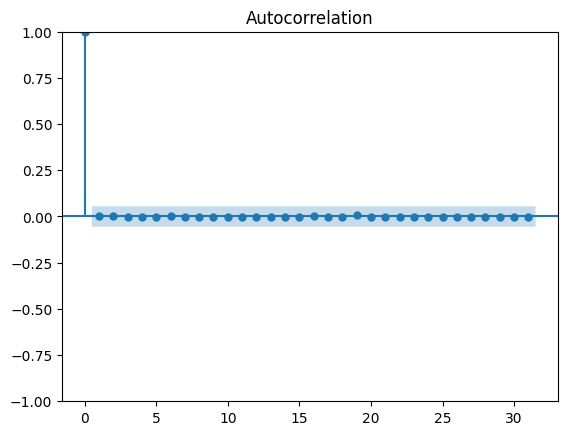

In [80]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

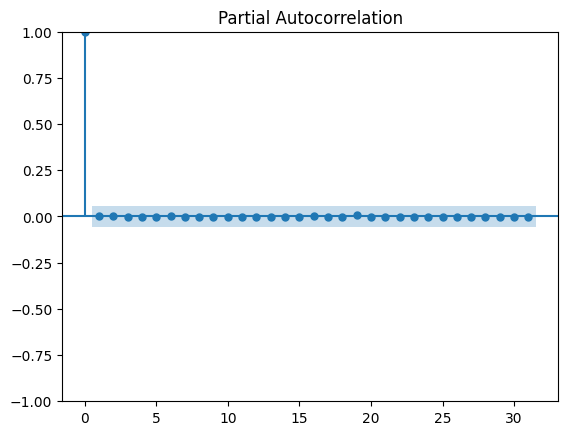

In [81]:
plot_pacf(squared_residual)
plt.show()

## US Monthly

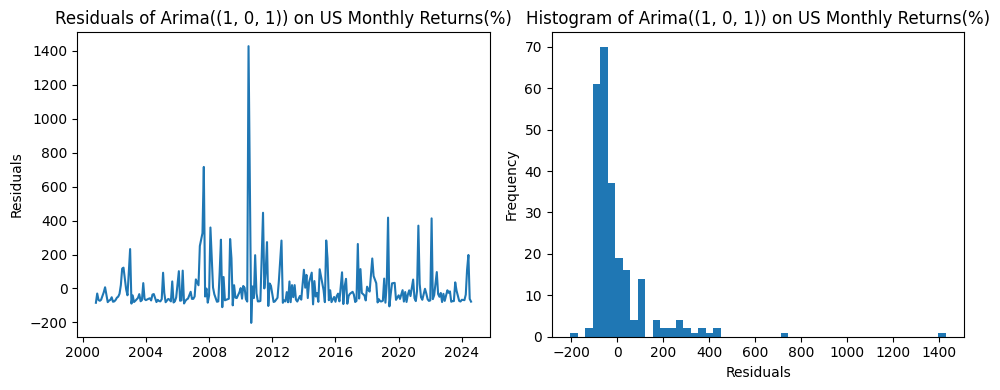

In [82]:
p, d, q = 1, 0, 1
df, residuals = model(us_monthly, p, d, q)

plt.figure(figsize=(10, 4))
plt.subplot(1,2, 1)
plt.plot(residuals, label='Residuals')
plt.title(f'Residuals of Arima({p, d, q}) on US Monthly Returns(%)')
plt.ylabel('Residuals')

plt.subplot(1, 2, 2)
plt.hist(residuals, bins=50)
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title(f'Histogram of Arima({p, d, q}) on US Monthly Returns(%)')
plt.tight_layout()
plt.show()

In [83]:
df

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   SARIMAX Results                                    
======================================================================================
Dep. Variable:     Monthly Change (%) Squared   No. Observations:                  246
Model:                         ARIMA(1, 0, 1)   Log Likelihood               -1573.790
Date:                        Sat, 12 Oct 2024   AIC                           3155.580
Time:                                10:52:11   BIC                           3169.601
Sample:                                     0   HQIC                          3161.225
                                        - 246                                         
Covariance Type:                          opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         84.3362     17.655      4.777      0.000      49.733     118.939
ar.L1          0.0281      1.018      0.028      0.978      -1.967       2.023
ma.L1          0.0721      1.047      0.069      0.945      -1.980       2.124
sigma2       2.11e+04    717.681     29.403      0.000    1.97e+04    2.25e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             16840.58
Prob(Q):                              1.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.72   Skew:                             5.05
Prob(H) (two-sided):                  0.14   Kurtosis:                        42.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
result = adfuller(residuals)
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -15.586029924854552
p-value: 1.9061055186608243e-28


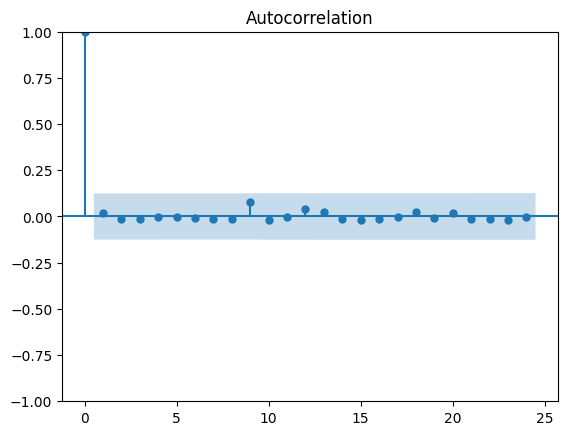

In [85]:
squared_residual = residuals**2
plot_acf(squared_residual)
plt.show()

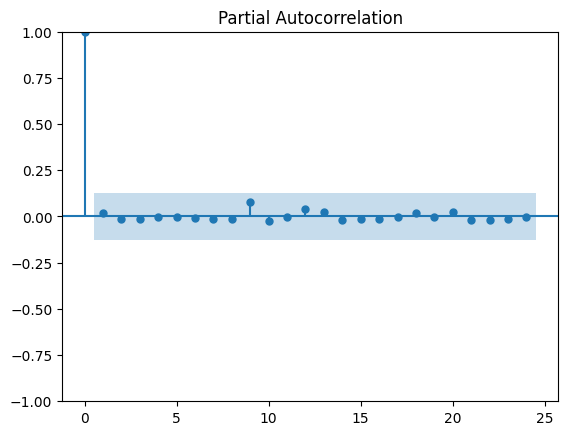

In [86]:
plot_pacf(squared_residual)
plt.show()